In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Generator import generate_synthetic_image
from Models import KeypointDataset, extract_keypoints_from_target

import matplotlib.pyplot as plt
import numpy as np

import random

# Test all shape types
shape_types = ["triangle", "quadrilateral", "star", "checkerboard", "cube", "multiple"]

TEST 1: RGB Image Generation
----------------------------------------------------------------------
✓ triangle: shape=(256, 256, 3), dtype=uint8, keypoints=3
✓ quadrilateral: shape=(256, 256, 3), dtype=uint8, keypoints=4
✓ star: shape=(256, 256, 3), dtype=uint8, keypoints=7
✓ checkerboard: shape=(256, 256, 3), dtype=uint8, keypoints=16
✓ cube: shape=(256, 256, 3), dtype=uint8, keypoints=7
✓ multiple: shape=(256, 256, 3), dtype=uint8, keypoints=14


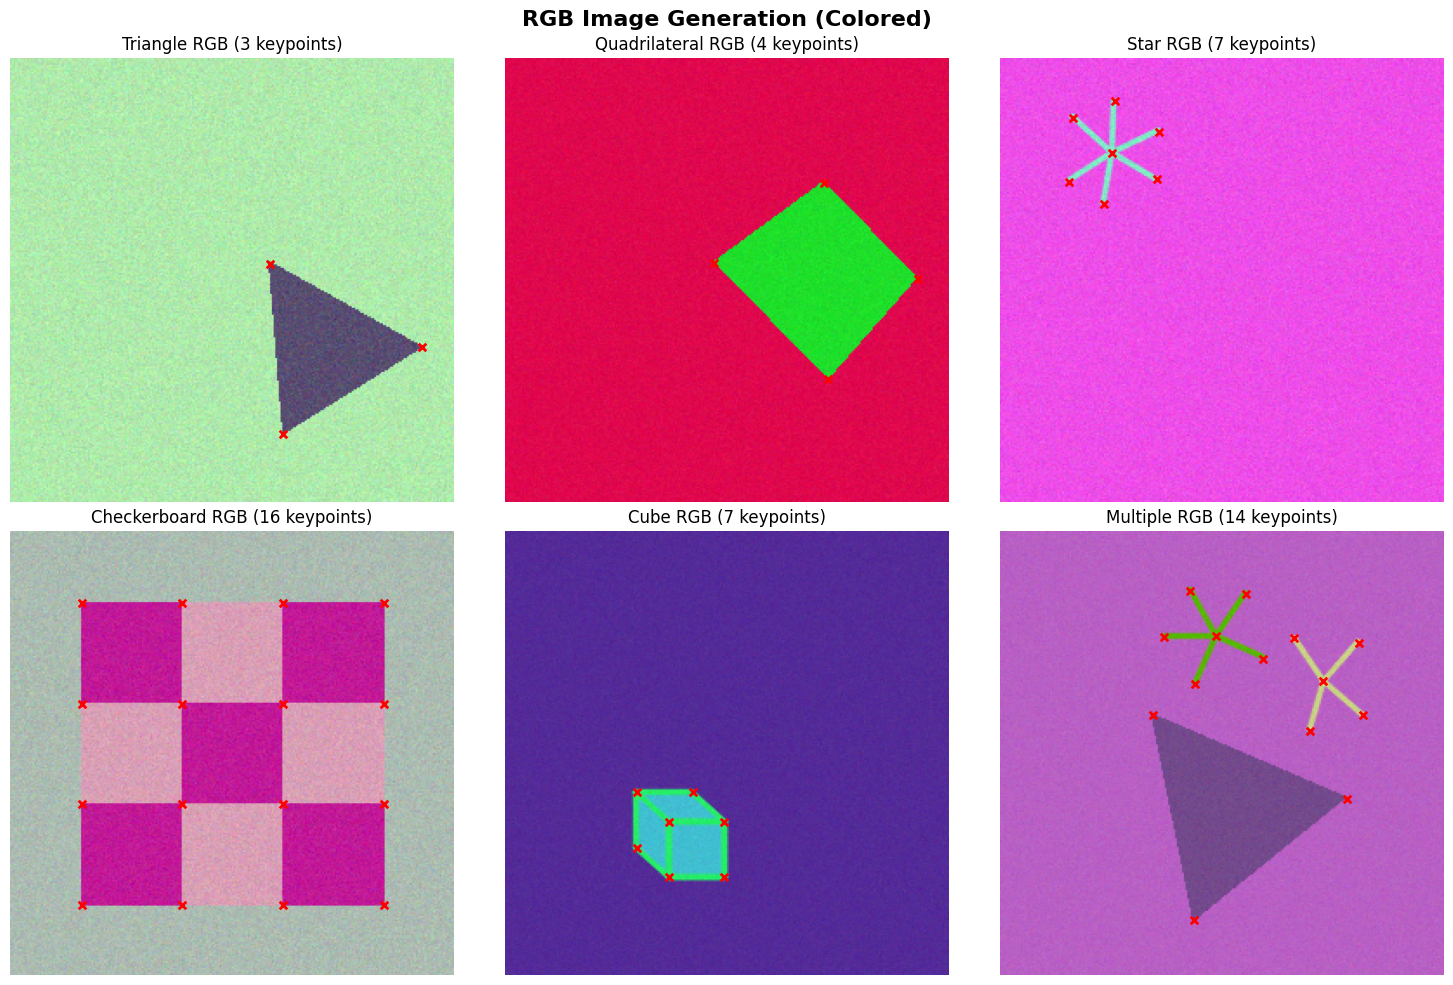

In [2]:
# ============================================================
# TEST 1: RGB Generation (for visualization/testing)
# ============================================================
print("TEST 1: RGB Image Generation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=False,
        grayscale=False  # RGB mode
    )

    axes[i].imshow(img)  # RGB image - no cmap needed
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} RGB ({len(keypoints)} keypoints)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: shape={img.shape}, dtype={img.dtype}, keypoints={len(keypoints)}")

plt.suptitle("RGB Image Generation (Colored)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print()

TEST 2: Grayscale Image Generation
----------------------------------------------------------------------
✓ triangle: shape=(256, 256), dtype=uint8, keypoints=3
✓ quadrilateral: shape=(256, 256), dtype=uint8, keypoints=4
✓ star: shape=(256, 256), dtype=uint8, keypoints=5
✓ checkerboard: shape=(256, 256), dtype=uint8, keypoints=24
✓ cube: shape=(256, 256), dtype=uint8, keypoints=7
✓ multiple: shape=(256, 256), dtype=uint8, keypoints=9


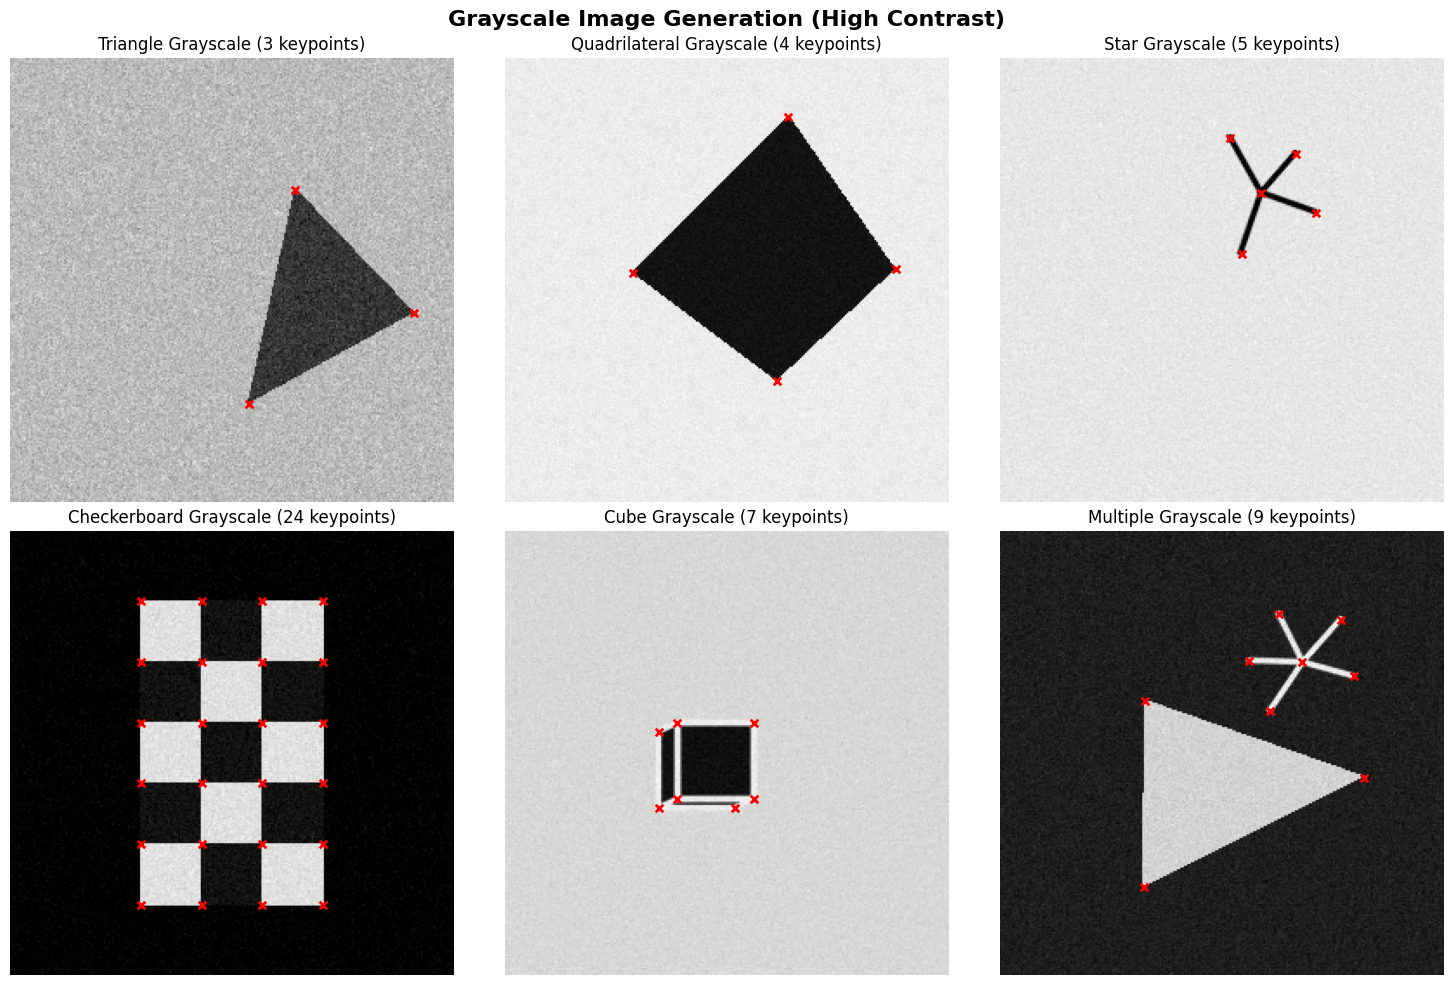

In [3]:
# ============================================================
# TEST 2: Grayscale Generation (for training dataset)
# ============================================================
print("TEST 2: Grayscale Image Generation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=False,
        grayscale=True  # Grayscale mode
    )

    axes[i].imshow(img, cmap='gray')  # Grayscale - use gray colormap
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} Grayscale ({len(keypoints)} keypoints)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: shape={img.shape}, dtype={img.dtype}, keypoints={len(keypoints)}")

plt.suptitle("Grayscale Image Generation (High Contrast)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print()

TEST 4: Grayscale with Homography Augmentation
----------------------------------------------------------------------
✓ triangle: keypoints after homography=1
✓ quadrilateral: keypoints after homography=2
✓ star: keypoints after homography=4
✓ checkerboard: keypoints after homography=16
✓ cube: keypoints after homography=1
✓ multiple: keypoints after homography=8


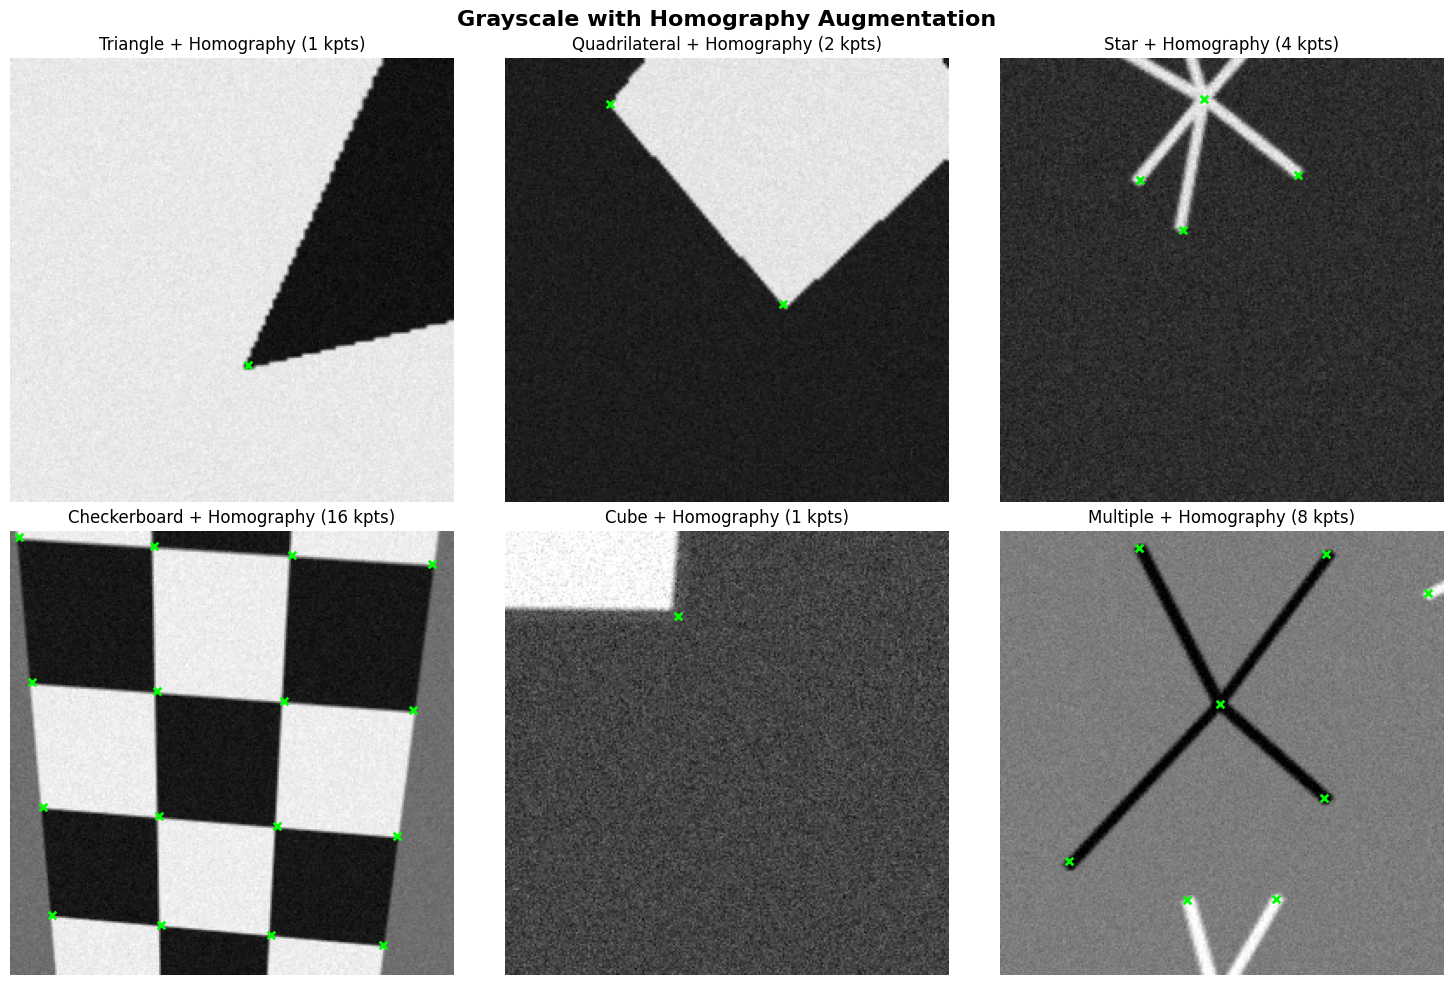

In [4]:
# ============================================================
# TEST 4: With Homography
# ============================================================
print("TEST 4: Grayscale with Homography Augmentation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=True,  # Apply homography
        grayscale=True
    )

    axes[i].imshow(img, cmap='gray')
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='lime', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} + Homography ({len(keypoints)} kpts)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: keypoints after homography={len(keypoints)}")

plt.suptitle("Grayscale with Homography Augmentation", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [5]:
# Generate and save dataset
print("Generating dataset with raw samples...")
dataset_generator = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    generate_fn=generate_synthetic_image,
    generate_kwargs={'width': 256, 'height': 256, 'shape_type': 'random', 'grayscale': True},
    use_homography_augment=False,
    use_photometric_augment=False,
    use_geometric_augment=False,
    pregenerate=True
)

# Save to file
dataset_generator.save_to_file('pregenerated_samples.npz')
print("Dataset saved!")

Generating dataset with raw samples...
Pre-generating 100 base samples...
  100/100 samples
✓ Pre-generation complete!
✓ Saved 100 samples to pregenerated_samples.npz
Dataset saved!


In [6]:
# Load dataset from file with different augmentation settings
print("Loading dataset without augmentation (raw samples)...")
dataset_raw = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=False,
    use_photometric_augment=False,
    use_geometric_augment=False,
    pregenerate=False,
    load_from_file='pregenerated_samples.npz'
)

print("\nLoading dataset with augmentation (from same file)...")
dataset_augmented = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=True,
    use_photometric_augment=True,
    use_geometric_augment=True,
    pregenerate=False,
    load_from_file='pregenerated_samples.npz'
)

print("\nLoading dataset with fresh random generation + augmentation...")
dataset_fresh = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=True,
    use_photometric_augment=True,
    use_geometric_augment=True,
    pregenerate=False,
    generate_fn=generate_synthetic_image,
    generate_kwargs={
        'width': 256,
        'height': 256,
        'shape_type': 'random',
        'grayscale': True,
    }
)

print("\nAll datasets loaded!")

Loading dataset without augmentation (raw samples)...
Loading 100 samples from pregenerated_samples.npz...
✓ Loaded 100 samples!

Loading dataset with augmentation (from same file)...
Loading 100 samples from pregenerated_samples.npz...
✓ Loaded 100 samples!

Loading dataset with fresh random generation + augmentation...

All datasets loaded!


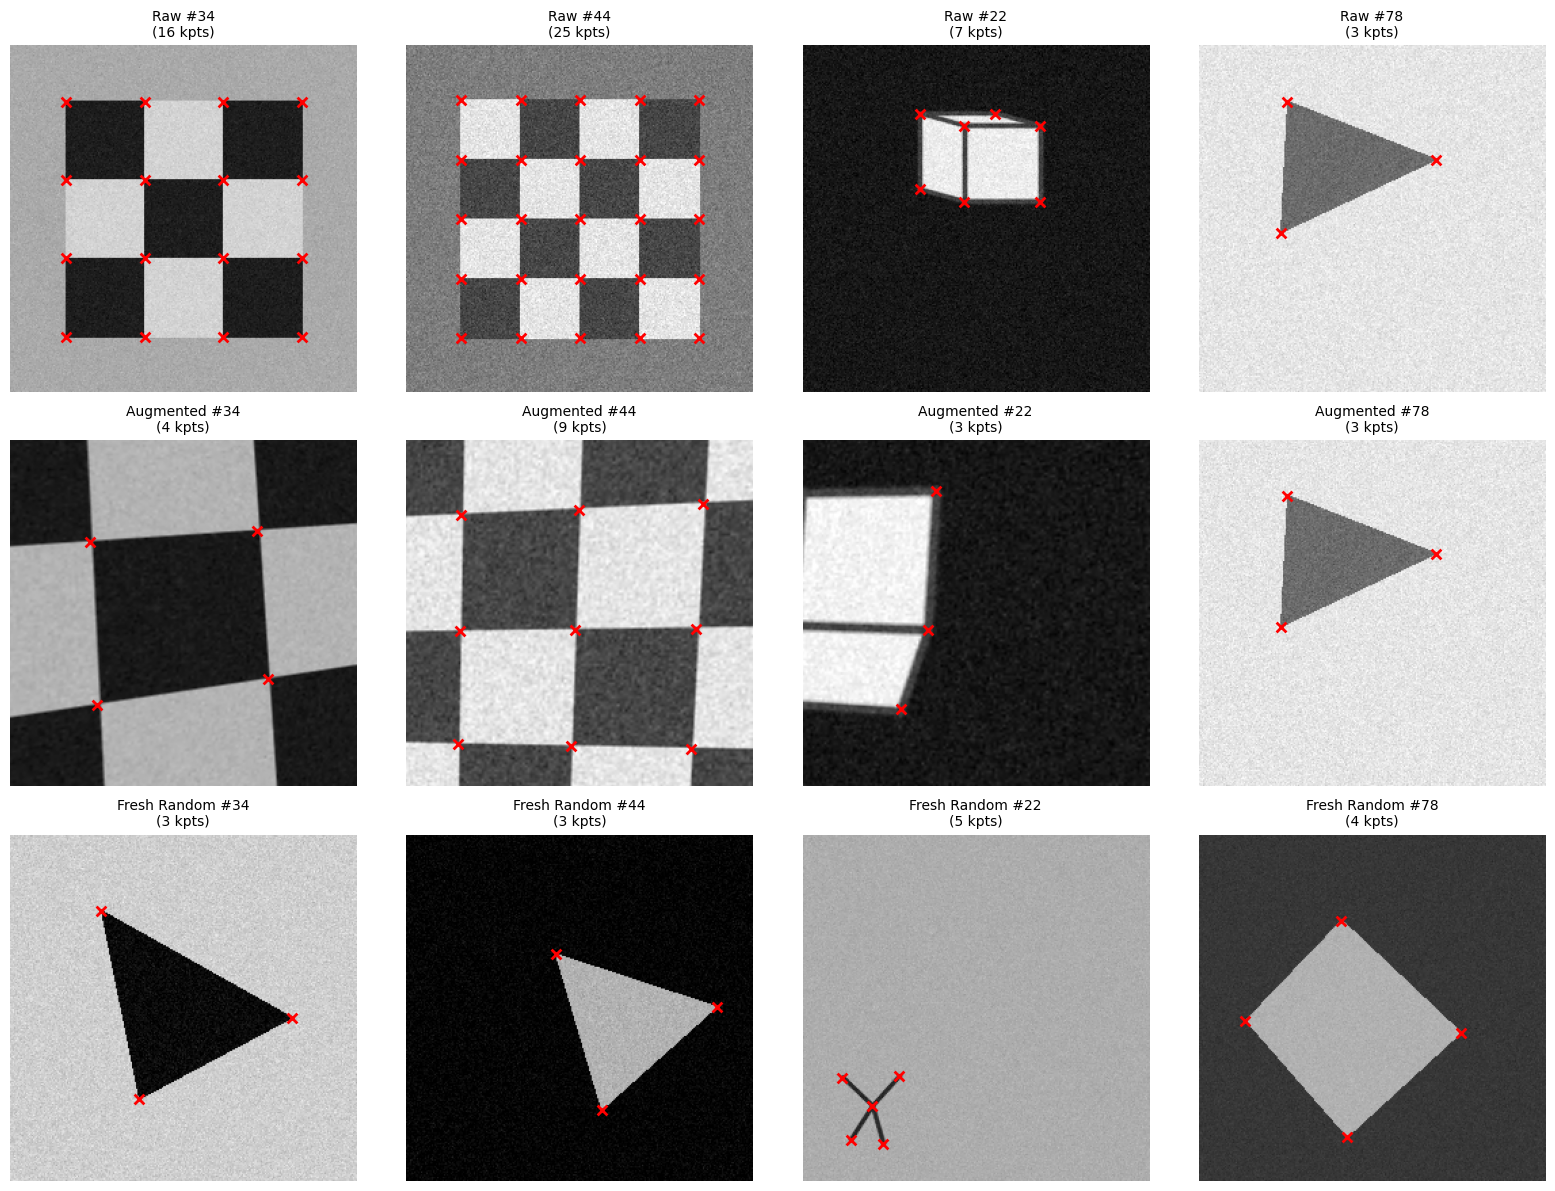

In [7]:
# Select 4 random sample indices
num_samples_to_show = 4
random_indices = random.sample(range(len(dataset_raw.pregenerated_data)), num_samples_to_show)

# Create 3-row plot: raw, augmented from file, fresh random
fig, axes = plt.subplots(3, num_samples_to_show, figsize=(16, 12))

for col, idx in enumerate(random_indices):
    # Row 1: Raw sample (no augmentation)
    img_raw, target_raw = dataset_raw[idx]
    img_raw_np = img_raw.squeeze().numpy()
    raw_kpts = extract_keypoints_from_target(target_raw)

    axes[0, col].imshow(img_raw_np, cmap='gray', vmin=0, vmax=1)
    if len(raw_kpts) > 0:
        axes[0, col].scatter(raw_kpts[:, 0], raw_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[0, col].set_title(f'Raw #{idx}\n({len(raw_kpts)} kpts)', fontsize=10)
    axes[0, col].axis('off')

    # Row 2: Augmented sample (same base image from file)
    img_aug, target_aug = dataset_augmented[idx]
    img_aug_np = img_aug.squeeze().numpy()
    aug_kpts = extract_keypoints_from_target(target_aug)

    axes[1, col].imshow(img_aug_np, cmap='gray', vmin=0, vmax=1)
    if len(aug_kpts) > 0:
        axes[1, col].scatter(aug_kpts[:, 0], aug_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[1, col].set_title(f'Augmented #{idx}\n({len(aug_kpts)} kpts)', fontsize=10)
    axes[1, col].axis('off')

    # Row 3: Fresh random generation (completely new image)
    img_fresh, target_fresh = dataset_fresh[idx]
    img_fresh_np = img_fresh.squeeze().numpy()
    fresh_kpts = extract_keypoints_from_target(target_fresh)

    axes[2, col].imshow(img_fresh_np, cmap='gray', vmin=0, vmax=1)
    if len(fresh_kpts) > 0:
        axes[2, col].scatter(fresh_kpts[:, 0], fresh_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[2, col].set_title(f'Fresh Random #{idx}\n({len(fresh_kpts)} kpts)', fontsize=10)
    axes[2, col].axis('off')

# Row labels
axes[0, 0].set_ylabel('Raw\n(No Augmentation)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Augmented\n(From File)', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Fresh Random\n(Generated)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [8]:
import torch
from Helper import load_checkpoint_generic
from Models import KeypointNet, process_output_torch, detect_local_maxima

✅ Loaded checkpoint: ./checkpoints\checkpoint_epoch_20000.pth (epoch 20000)
✓ Loaded checkpoint (iteration 20,000)


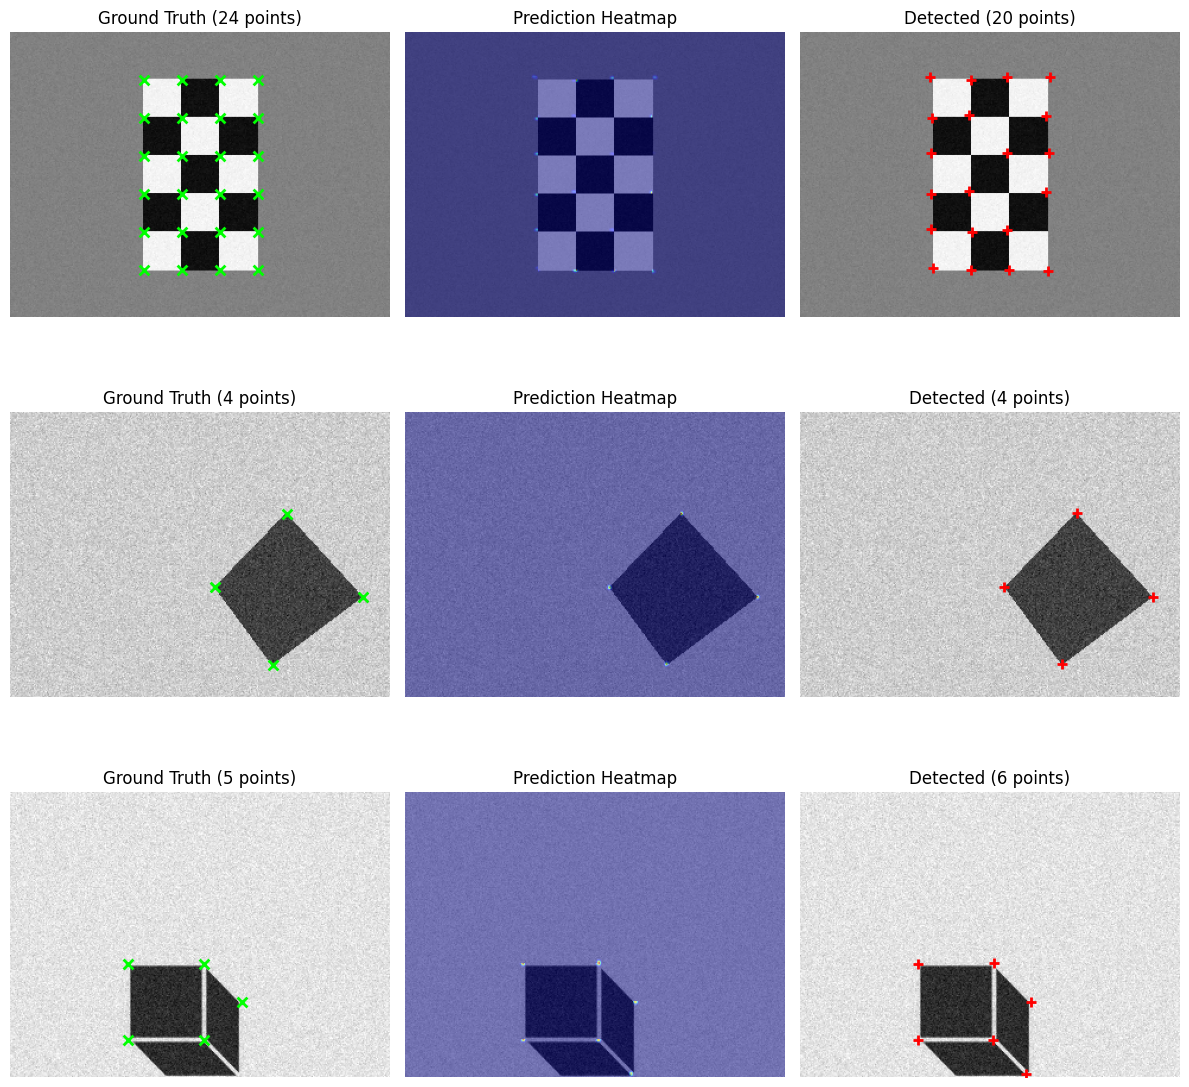

✓ Displayed 3 samples


In [27]:
# ============================================================
# Quick Model Test - On-the-fly Generation
# ============================================================

# Configuration
num_samples = 3
image_size = (240, 320)
checkpoint_dir = './checkpoints'

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KeypointNet().to(device)

# Load checkpoint
checkpoint = load_checkpoint_generic(checkpoint_dir, device)
if checkpoint:
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"✓ Loaded checkpoint (iteration {checkpoint.get('iteration', 'unknown'):,})")
else:
    print("⚠️  No checkpoint found!")

model.eval()

# Generate and visualize samples
fig, axes = plt.subplots(num_samples, 3, figsize=(12, 4 * num_samples))
if num_samples == 1:
    axes = axes.reshape(1, -1)

with torch.no_grad():
    for i in range(num_samples):
        # Generate fresh sample on-the-fly
        img, keypoints = generate_synthetic_image(
            width=image_size[1],
            height=image_size[0],
            grayscale=True,
            use_homography=False
        )

        # Normalize and prepare for model
        img_normalized = img.astype(np.float32) / 255.0
        image_tensor = torch.from_numpy(img_normalized[np.newaxis, np.newaxis, :, :]).to(device)

        # Get prediction
        logits = model(image_tensor, return_logits=True)
        heatmap = model(image_tensor, return_logits=False)

        # Extract predicted keypoints
        heatmap_np = heatmap.squeeze().cpu().numpy()
        pred_kpts = detect_local_maxima(heatmap_np, threshold=0.01)

        # Plot 1: Ground truth
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].scatter(keypoints[:, 0], keypoints[:, 1],
                          c='lime', s=50, marker='x', linewidths=2)
        axes[i, 0].set_title(f'Ground Truth ({len(keypoints)} points)')
        axes[i, 0].axis('off')

        # Plot 2: Heatmap
        axes[i, 1].imshow(img, cmap='gray')
        axes[i, 1].imshow(heatmap_np, cmap='jet', alpha=0.5)
        axes[i, 1].set_title('Prediction Heatmap')
        axes[i, 1].axis('off')

        # Plot 3: Detected keypoints
        axes[i, 2].imshow(img, cmap='gray')
        if len(pred_kpts) > 0:
            axes[i, 2].scatter(pred_kpts[:, 0], pred_kpts[:, 1],
                              c='red', s=50, marker='+', linewidths=2)
        axes[i, 2].set_title(f'Detected ({len(pred_kpts)} points)')
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
print(f"✓ Displayed {num_samples} samples")

Initializing model...
✅ Loaded checkpoint: ./checkpoints\checkpoint_epoch_20000.pth (epoch 20000)
✓ Loaded checkpoint from iteration 20,000

Running homography adaptation...
Original size: 240x320, Padded size: 384x512
Processing original image...
  Processed 20/99 homographies
  Processed 40/99 homographies
  Processed 60/99 homographies
  Processed 80/99 homographies
✓ Detected 4 keypoints after homography adaptation
Detected 4 keypoints


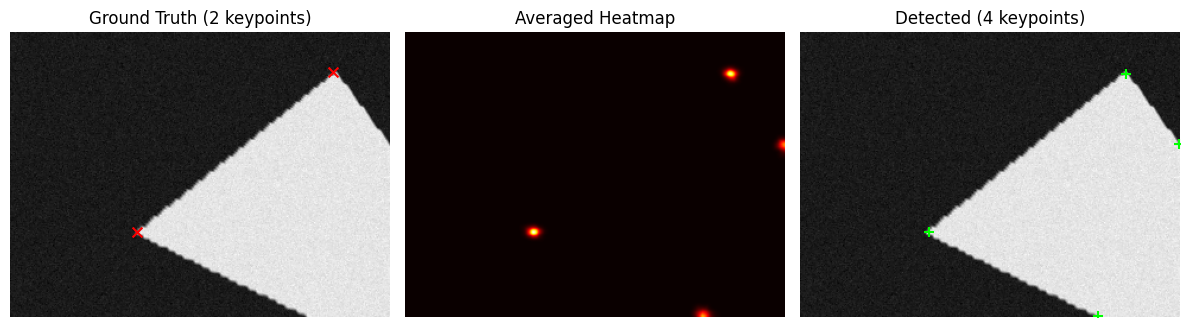

In [20]:
from Models import homography_adaptation

# Load your trained model
# Test configuration
test_checkpoint_dir = './checkpoints'  # Path to checkpoint directory

# Initialize model
print("Initializing model...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KeypointNet().to(device)

# Load latest checkpoint
checkpoint = load_checkpoint_generic(test_checkpoint_dir, device)
if checkpoint:
    model.load_state_dict(checkpoint['model_state_dict'])
    iteration = checkpoint.get('iteration', 'unknown')
    print(f"✓ Loaded checkpoint from iteration {iteration:,}")
else:
    print("⚠️  No checkpoint found! Using untrained model.")

print()

model.eval()

# Load test image
img, true_kpts = generate_synthetic_image(320, 240, grayscale=True, use_homography=True)
img_normalized = img.astype(np.float32) / 255.0
img_tensor = torch.from_numpy(img_normalized[np.newaxis, np.newaxis, :, :]).float().to('cuda')

# Apply homography adaptation
print("Running homography adaptation...")
averaged_heatmap, detected_kpts = homography_adaptation(
    model,
    img_tensor,
    num_iter=99,
    threshold=0.05
)

print(f"Detected {len(detected_kpts)} keypoints")

# Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.scatter(true_kpts[:, 0], true_kpts[:, 1], c='red', s=50, marker='x')
plt.title(f'Ground Truth ({len(true_kpts)} keypoints)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(averaged_heatmap.squeeze().cpu().numpy(), cmap='hot')
plt.title('Averaged Heatmap')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.scatter(detected_kpts[:, 0], detected_kpts[:, 1], c='lime', s=50, marker='+')
plt.title(f'Detected ({len(detected_kpts)} keypoints)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def test_extract_keypoints_from_target():
    from Models import extract_keypoints_from_target, prepare_training_target_basic

    # Generate sample and visualize target
    img, kpts = generate_synthetic_image(256, 256, grayscale=True)
    target = prepare_training_target_basic([kpts], (256, 256))

    # Check target statistics
    print(f"Keypoints generated: {len(kpts)}")
    print(f"Active cells in target: {(target[0, :64].sum(dim=0) > 0).sum()}")
    print(f"No-point cells: {(target[0, 64] > 0).sum()}")

    # Extract keypoints from target
    extracted = extract_keypoints_from_target(target[0])
    print(f"Keypoints extracted: {len(extracted)}")

test_extract_keypoints_from_target()